Importar Librerías

In [2]:
from confluent_kafka import Consumer, Producer
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd

Productor

In [3]:
#Leer CSV
csv_file_path = 'data_empresas.csv'
df = pd.read_csv(csv_file_path)

producer = Producer({'bootstrap.servers': 'localhost:9092'})

for _, row in df.iterrows():
    message = f"{row['empresa']},{row['pais']},{row['precioLY']},{row['precioCY']}"
    producer.produce('testtopic', value=message)

producer.flush()

0

Consumidor

No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje


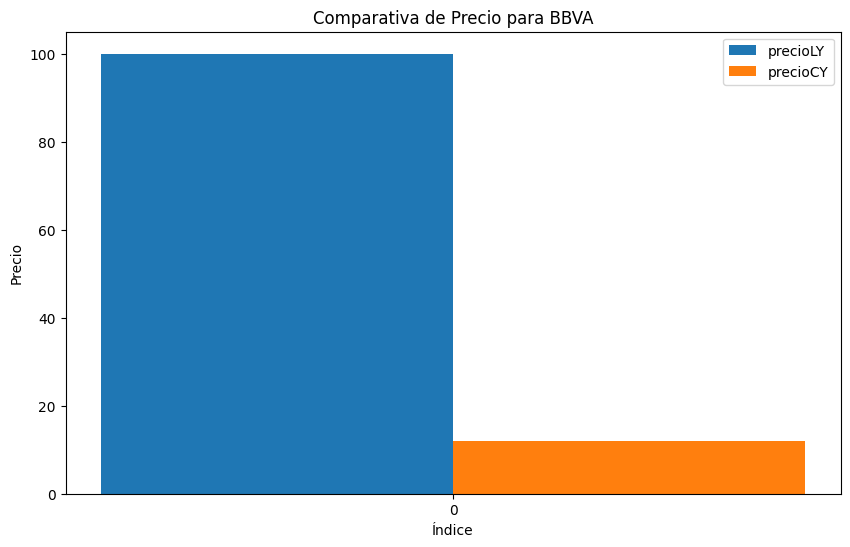

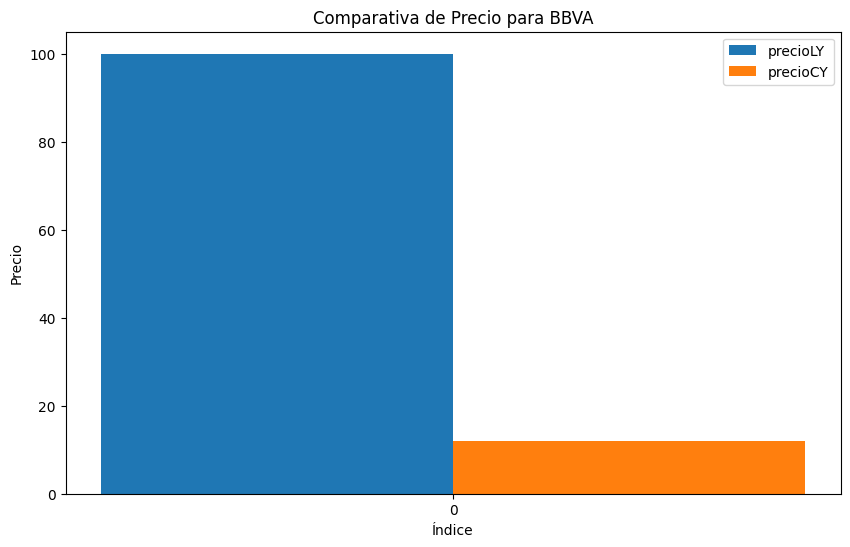

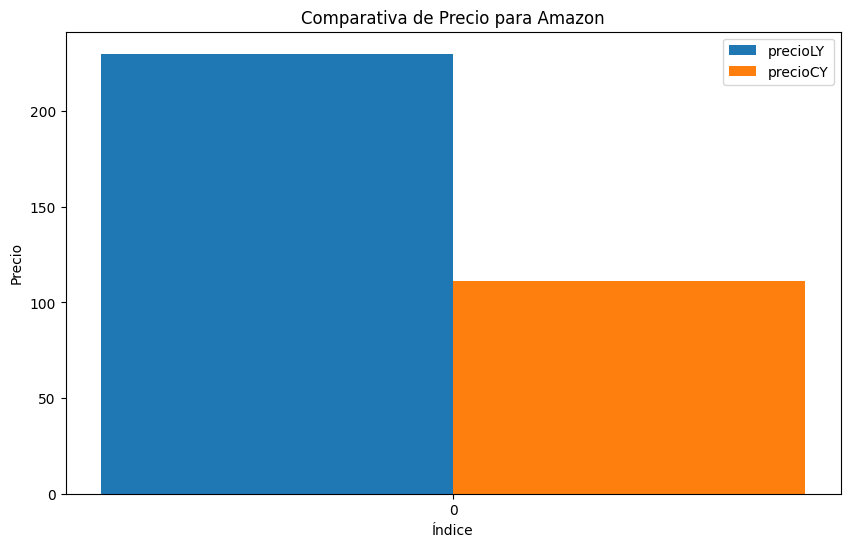

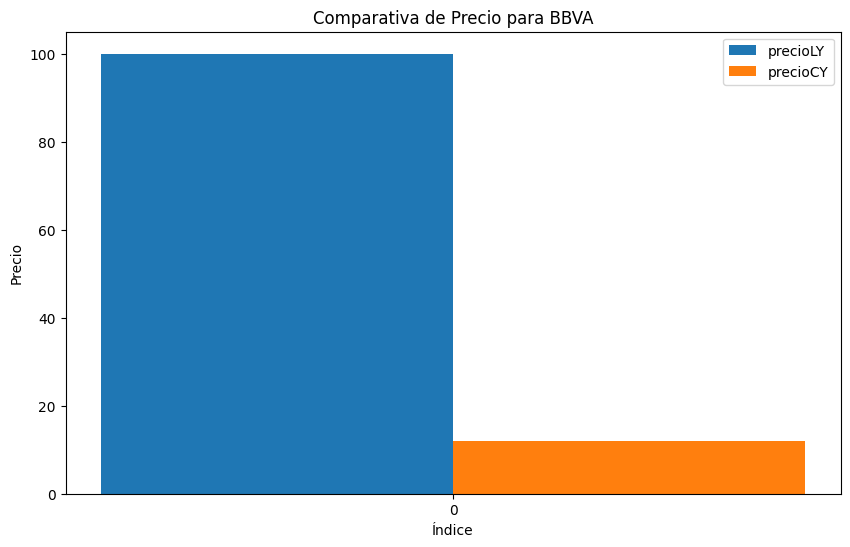

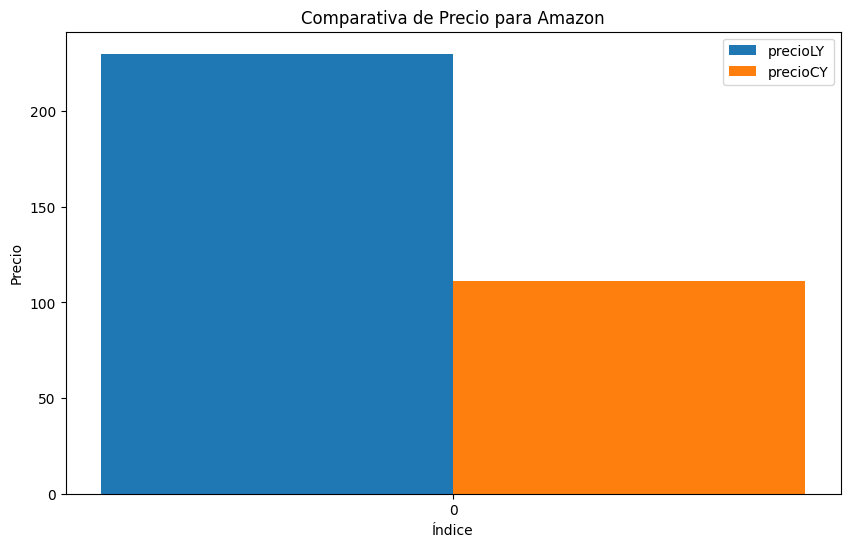

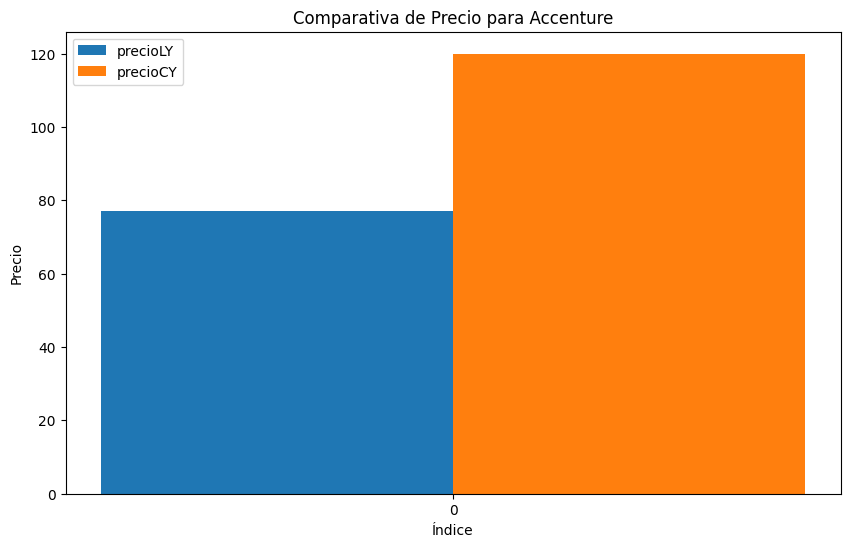

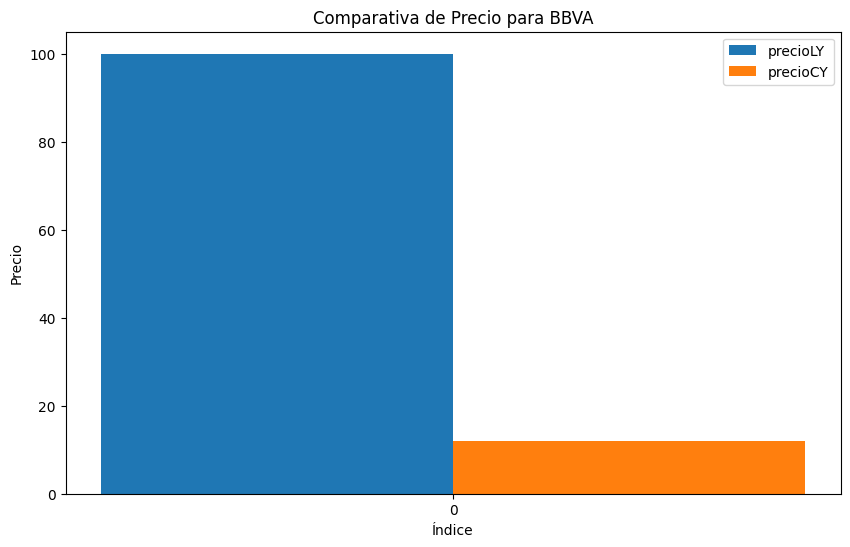

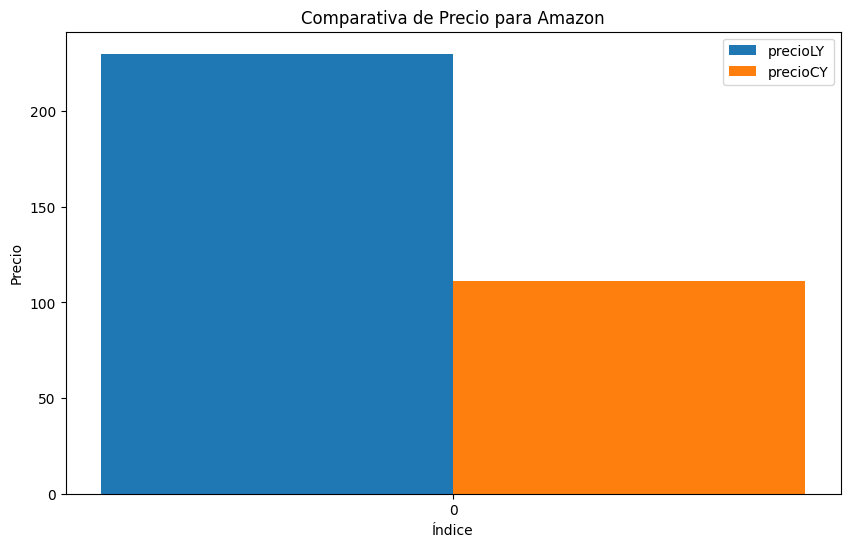

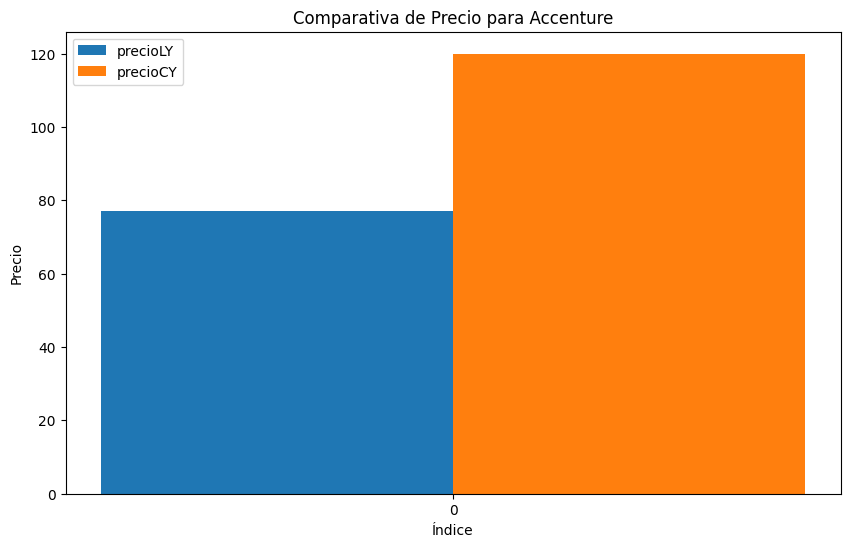

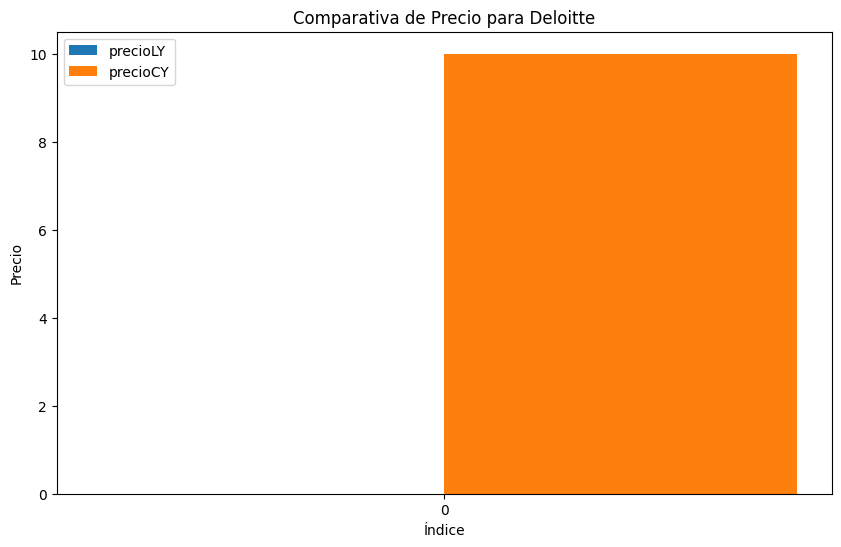

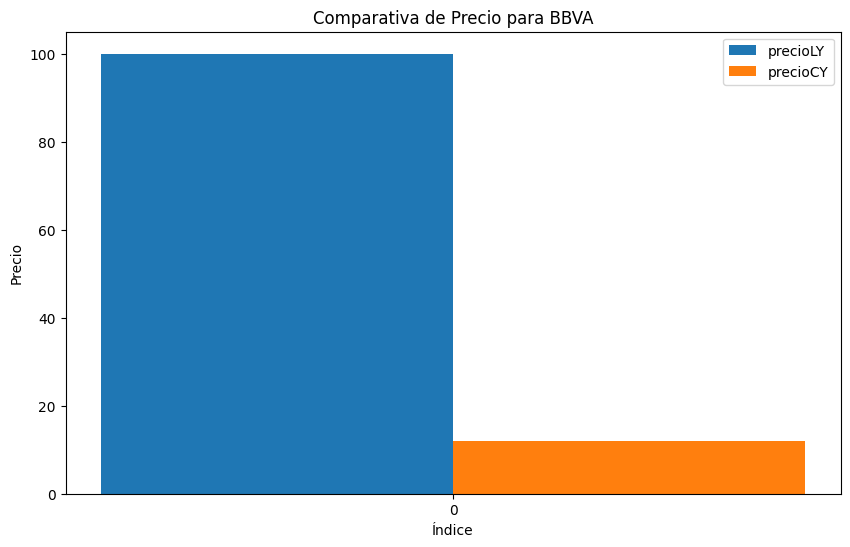

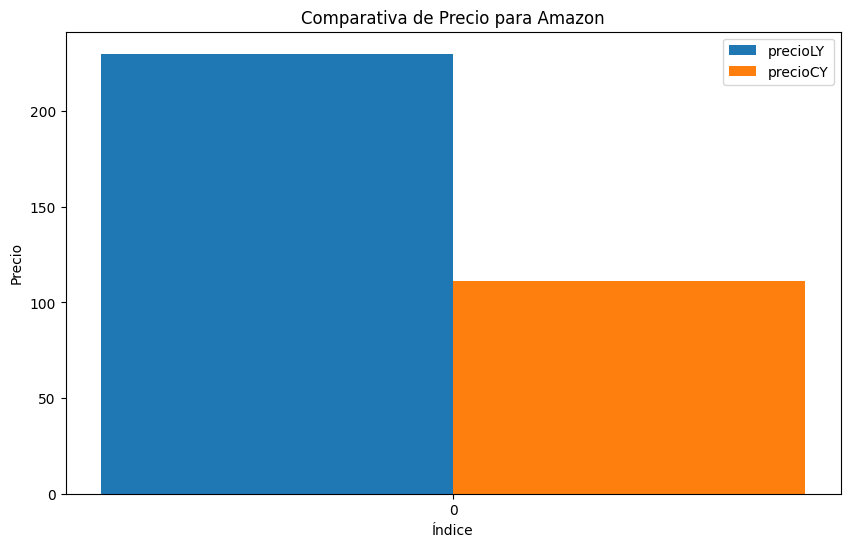

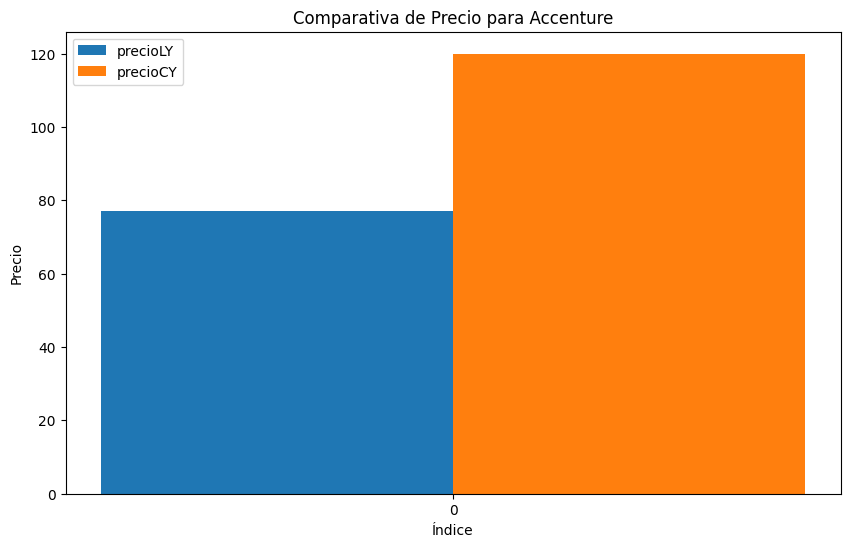

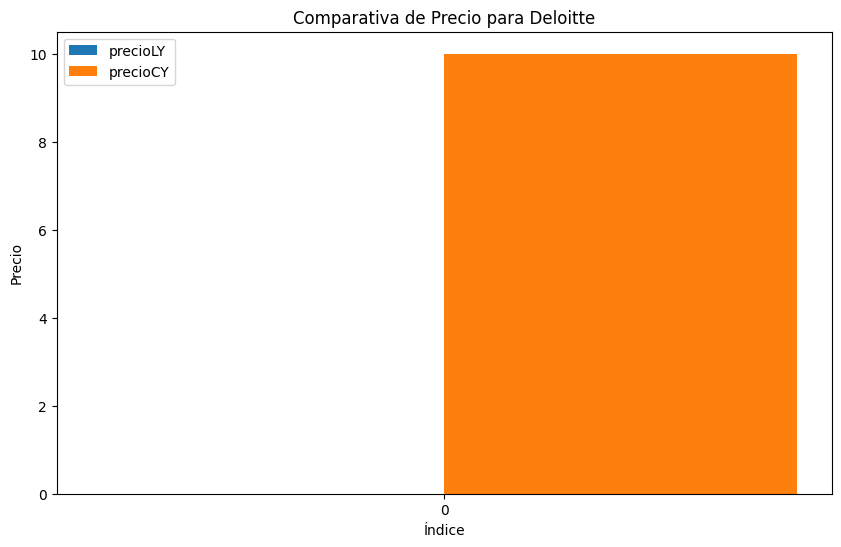

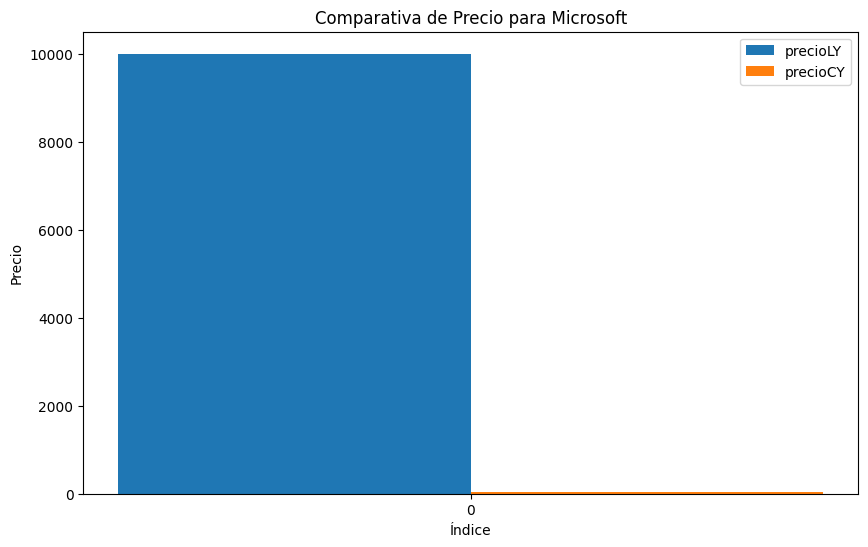

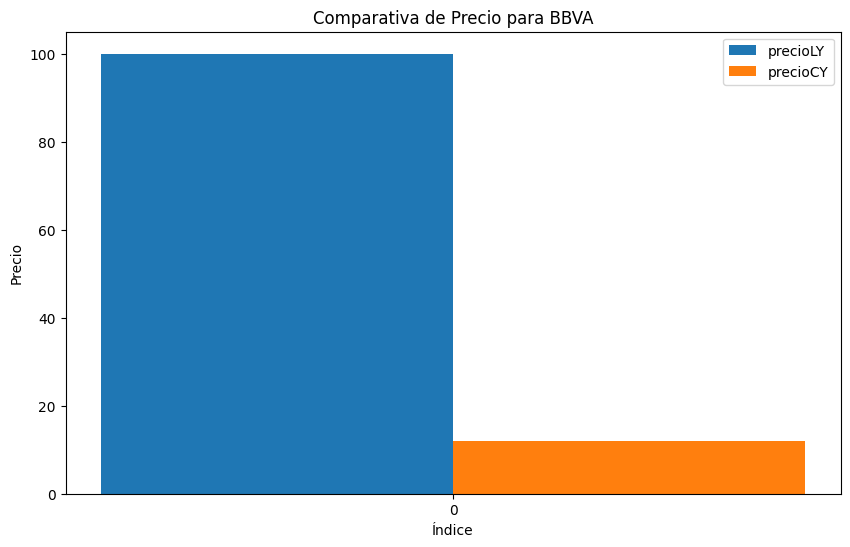

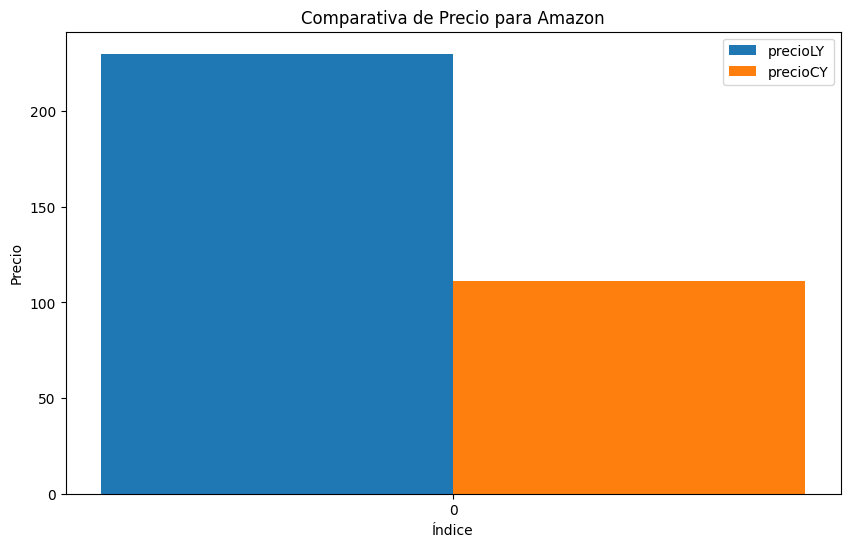

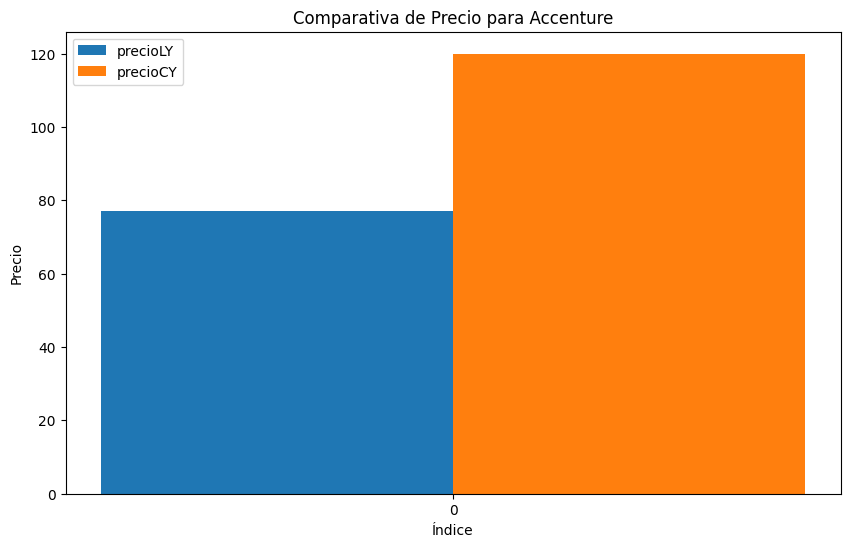

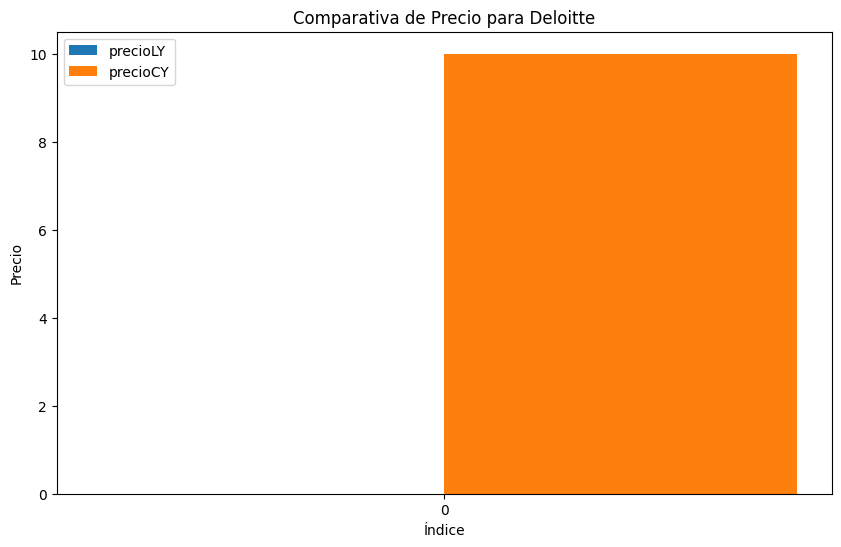

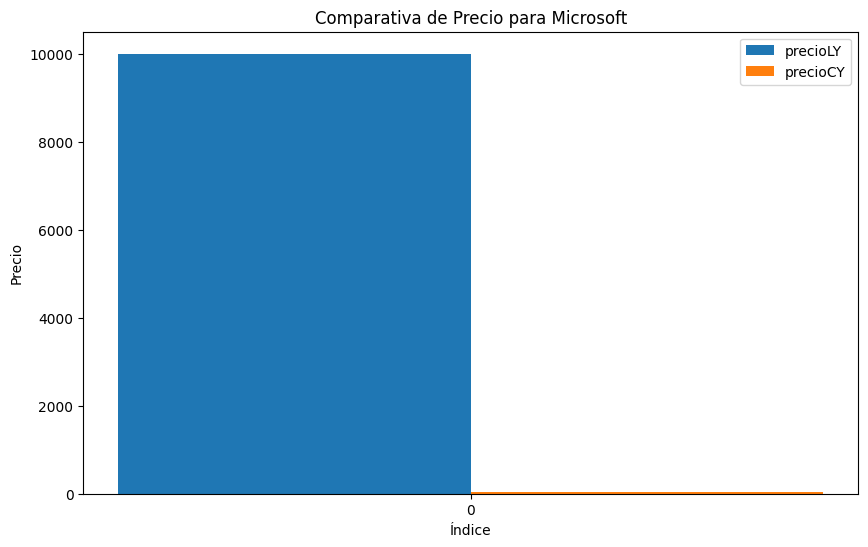

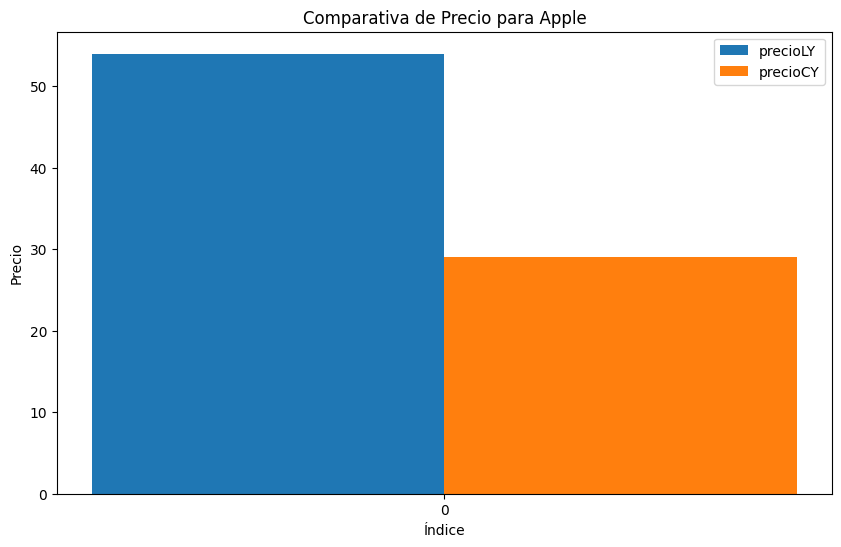

No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje
No hay ningún mensaje


In [4]:
c = Consumer({'bootstrap.servers': 'localhost:9092', 'group.id': 'migrupo', 'auto.offset.reset': 'earliest'})
c.subscribe(['testtopic'])

plot_df = pd.DataFrame(columns=['empresa', 'pais', 'precioLY', 'precioCY'])

try:
    while True:
        msg = c.poll(1.0)
        if msg is None:
            print("No hay ningún mensaje")
            continue
        if msg.error():
            print('Error: {}'.format(msg.error()))
            continue

        message_data = StringIO(msg.value().decode('utf-8'))
        row_data = pd.read_csv(message_data, header=None, names=['empresa', 'pais', 'precioLY', 'precioCY'])

        plot_df = pd.concat([plot_df, row_data], ignore_index=True)

        empresasunicas = plot_df['empresa'].unique()
        bar_width = 0.35  # Ancho de las barras
        for valempresa in empresasunicas:
            data_empresa = plot_df[plot_df['empresa'] == valempresa]
            indices = range(len(data_empresa))
            plt.figure(figsize=(10, 6))
            plt.bar(indices, data_empresa['precioLY'], width=bar_width, label='precioLY')
            plt.bar([i + bar_width for i in indices], data_empresa['precioCY'], width=bar_width, label='precioCY')
            plt.title(f'Comparativa de Precio para {valempresa}')
            plt.xlabel('Índice')
            plt.ylabel('Precio')
            plt.xticks([i + bar_width / 2 for i in indices], indices)
            plt.legend()
            plt.show()

except KeyboardInterrupt:
    pass
finally:
    c.close()